# Lab 2: Frequency Domain Identification Techniques

In [1]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
from vibration_toolbox import sdof_cf
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math
import scipy.linalg as la

Interactive iPython tools will not work without IPython.display           and ipywidgets installed.
Interactive iPython tools will not work without IPython.display           and ipywidgets installed.


Beam Properties
-----------------------

In [2]:
l=21.75*0.0254;# length in meters
h=0.5*0.0254;# height in meters
w=1*0.0254;# width in meters
A=w*h;
rho=2700;# density in kg/cubicmeter
E=7.31e10;# youngs modulus in Pa
I = (1/12)*w*h**3; # moment of inertia (m^4)
k = (3*E*I)/l**3; # stiffness (N/m)
V = l*w*h;# volume (m^3)
m = rho*V;# mass (kg)
wn = (np.sqrt(k/m))/(2*math.pi) # analytical natural frequency of massless beam with concentrated mass in Hz
wnunibeam=((1.875)**(2)*np.sqrt((E*I)/(m*(l)**3)))/(2*math.pi) # natural freqency of a uniform section beam in Hz
#c_cr = 2*sqrt(k*m); # critical damping coefficient

In [3]:
wn

17.229977388638673

In [4]:
wnunibeam

34.972495605920052

Freq versus Magnitude plot
-------------------------------

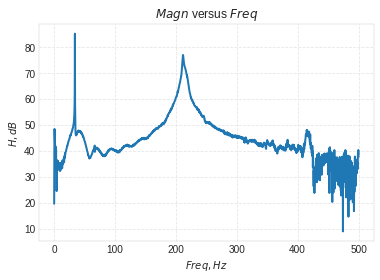

In [5]:
# Mag vs Freq

%matplotlib inline
mat_contents=sio.loadmat('Case2-2.mat')
f = mat_contents['Freq_domain']
Hf_chan_2 = mat_contents['Hf_chan_2']
H= (20)*(np.log10(np.abs(Hf_chan_2)))
plt.plot(f, H)
plt.grid(True)
plt.xlabel('$Freq,Hz$')
plt.ylabel('$H,dB$')
plt.title('$Magn$ versus $Freq$')

Quadrature peak picking
---------------------------

In [6]:
hpeak=85.23;# obtained from plot
fd=34.06 #obtained from plot
thredb=(hpeak)/np.sqrt(2);
fda=33.65;#obtained from plot
fdb=34.35;#obtained from plot
zeta=(fdb-fda)/(2*fd)
fn=fd/np.sqrt(1-zeta**2) # in hertz

In [7]:
fd

34.06

In [8]:
zeta

0.010275983558426348

In [9]:
fn

34.061798439554778

## Using Vibration Toolbox

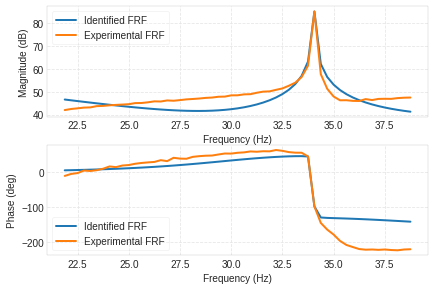

(0.00038369496345961473, 34.042986534080605, 16.813265077521343)

In [10]:
    %matplotlib inline
    mat_contents=sio.loadmat('Case2-2.mat')
    f = mat_contents['Freq_domain']
    TF = mat_contents['Hf_chan_2']
    Fmin=70
    Fmax=125
    sdof_cf(f, TF, Fmin, Fmax)
   

Closed form solution
--------------------------

In [11]:
Beta1= 1.87510407/l
Beta2= 4.69409133/l

w1=Beta1**2*np.sqrt((E*I)/(rho*A))
f1=((Beta1**2)/(2*math.pi))*np.sqrt((E*I)/(rho*A))
w2=Beta2**2*np.sqrt((E*I)/(rho*A))
f2=((Beta2**2)/(2*math.pi))*np.sqrt((E*I)/(rho*A))

In [12]:
Beta1

3.3941606842248166

In [13]:
Beta2

8.496861851751289

In [14]:
w1

219.76306397380711

In [15]:
f1

34.976377940451826

In [16]:
w2

1377.23172666088

In [17]:
f2

219.19323708106515

Beam Deflection at center due to an excitation on the tip with specified frequency (using vibration toolbox)
-----------------------------------------------------------------------------------------------------------------------------------

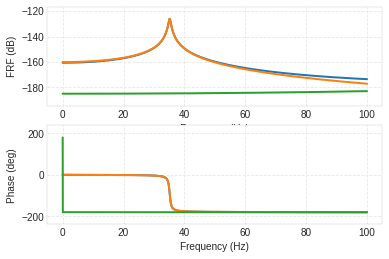

In [25]:
[fout,H]=vtb.euler_beam_frf(xin=l, xout=l/2, fmin=0.0, fmax=100.0, zeta=0.01,
                   bctype=2, npoints=2001,
                   beamparams=np.array([E, I,
rho, A, l]));



In [26]:
y=np.where(fout==100)

In [27]:
admittance = np.abs(H[2000])
excitationforce=100
displacement = admittance*excitationforce
displacement

array([  1.39445290e-07,   7.13702202e-08])